In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
import os

## Define "Adjusted R^2" function
The following adjusted R^2 is based on this formula to adjust for different number of predictors.
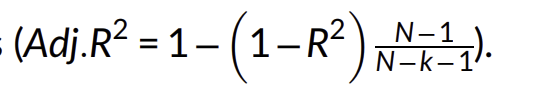

where N is the population size and k is the number of predictors.

In [2]:
def adjusted_r2(r2, N, k):
    return (1 - (1 - r2) * ((N - 1) / (N - k - 1)))

## Student ID One-Hot Encoding, Model Training, and Model Evaluation

In [3]:
data = pd.read_csv("allStudentProgramsDataWith0Score.csv")

In [5]:
data = data.drop(data.columns[0], axis=1)

In [6]:
data

,Year,Semester,Quiz/Exam,Student ID,Coding Problem,Earned Score,Maximum Score,Distance,Distance Z-score
0,2013,spring,quiz4,s111f453,BodyType,4,5,24.862069,2.369913e+00
1,2013,spring,quiz4,s18f746e0,BodyType,5,5,12.137931,-1.075291e+00
2,2013,spring,quiz4,s23f81012,BodyType,5,5,21.155172,1.366229e+00
3,2013,spring,quiz4,s27774cef,BodyType,5,5,16.810345,1.898177e-01
4,2013,spring,quiz4,s29d1098c,BodyType,4,5,19.344828,8.760574e-01
...,...,...,...,...,...,...,...,...,...
1719,2013,spring,quiz9w,s564281ce,Younger,1,5,21.000000,2.468070e-01
1720,2013,spring,quiz9w,s70c07b9e,Younger,1,5,20.800000,1.234035e-01
1721,2013,spring,quiz9w,sc2ea6ca8,Younger,0,5,23.600000,1.851053e+00
1722,2013,spring,quiz9w,sc6713607,Younger,5,5,19.000000,-9.872281e-01


In [7]:
student_encoder = OneHotEncoder()

In [8]:
student_encoder_df = pd.DataFrame(student_encoder.fit_transform(data[['Student ID']]).toarray())
data = data.sort_values(by=['Student ID'])
final_student_data = data.join(student_encoder_df)

In [9]:
final_student_data

,Year,Semester,Quiz/Exam,Student ID,Coding Problem,Earned Score,Maximum Score,Distance,Distance Z-score,0,...,150,151,152,153,154,155,156,157,158,159
0,2013,spring,quiz4,s111f453,BodyType,4,5,24.862069,2.369913,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1045,2013,spring,quiz2,s111f453,SquareLine,7,7,9.634921,-0.391082,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
960,2013,spring,quiz7,s111f453,ProdAll,6,6,6.982143,-0.698486,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1188,2013,spring,quiz1,s111f453,StarLine,0,5,17.830189,-0.218600,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
900,2013,spring,quiz7,s111f453,Power,6,6,7.338983,-0.536926,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,2013,fall,quiz2,sfee6ffa8,GrowingStairs,7,7,19.394737,-0.013467,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1330,2013,fall,quiz5,sfee6ffa8,Target,10,13,71.514286,-0.814510,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
670,2013,fall,quiz4,sfee6ffa8,Highway,4,5,10.806452,-0.928144,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1151,2013,fall,quiz2,sfee6ffa8,Stairs,7,7,11.948718,-0.446840,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
final_student_data2 = final_student_data.drop(final_student_data.iloc[:,0:8], axis=1)

In [11]:
final_student_data2

,Distance Z-score,0,1,2,3,4,5,6,7,8,...,150,151,152,153,154,155,156,157,158,159
0,2.369913,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1045,-0.391082,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
960,-0.698486,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1188,-0.218600,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
900,-0.536926,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,-0.013467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1330,-0.814510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
670,-0.928144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1151,-0.446840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
#final_student_data2.to_csv("student_model_data.csv", index=False)

In [13]:
X1 = final_student_data2.iloc[:, 1:]
y1 = final_student_data2.loc[:, ["Distance Z-score"]]
student_model = LinearRegression().fit(X1, y1)
student_model.coef_

array([[-1.49312844e+12, -1.49312844e+12, -1.49312844e+12,
        -1.49312844e+12, -1.49312844e+12, -1.49312844e+12,
        -1.49312844e+12, -1.49312844e+12, -1.49312844e+12,
        -1.49312844e+12, -1.49312844e+12, -1.49312844e+12,
        -1.49312844e+12, -1.49312844e+12, -1.49312844e+12,
        -1.49312844e+12, -1.49312844e+12, -1.49312844e+12,
        -1.49312844e+12, -1.49312844e+12, -1.49312844e+12,
        -1.49312844e+12, -1.49312844e+12, -1.49312844e+12,
        -1.49312844e+12, -1.49312844e+12, -1.49312844e+12,
        -1.49312844e+12, -1.49312844e+12, -1.49312844e+12,
        -1.49312844e+12, -1.49312844e+12, -1.49312844e+12,
        -1.49312844e+12, -1.49312844e+12, -1.49312844e+12,
        -1.49312844e+12, -1.49312844e+12, -1.49312844e+12,
        -1.49312844e+12, -1.49312844e+12, -1.49312844e+12,
        -1.49312844e+12, -1.49312844e+12, -1.49312844e+12,
        -1.49312844e+12, -1.49312844e+12, -1.49312844e+12,
        -1.49312844e+12, -1.49312844e+12, -1.49312844e+1

In [14]:
student_model.intercept_

array([1.49312844e+12])

In [15]:
student_model.score(X1, y1)

0.15242389876685736

In [16]:
adjusted_r2(student_model.score(X1, y1), X1.shape[0], X1.shape[1])

0.06565987048963229

## Coding Problem One-Hot Encoding, Model Training, and Model Evaluation

In [17]:
problem_data = pd.read_csv("allStudentProgramsDataWith0Score.csv")

In [19]:
problem_data = problem_data.drop(problem_data.columns[0], axis=1)

In [20]:
problem_data

,Year,Semester,Quiz/Exam,Student ID,Coding Problem,Earned Score,Maximum Score,Distance,Distance Z-score
0,2013,spring,quiz4,s111f453,BodyType,4,5,24.862069,2.369913e+00
1,2013,spring,quiz4,s18f746e0,BodyType,5,5,12.137931,-1.075291e+00
2,2013,spring,quiz4,s23f81012,BodyType,5,5,21.155172,1.366229e+00
3,2013,spring,quiz4,s27774cef,BodyType,5,5,16.810345,1.898177e-01
4,2013,spring,quiz4,s29d1098c,BodyType,4,5,19.344828,8.760574e-01
...,...,...,...,...,...,...,...,...,...
1719,2013,spring,quiz9w,s564281ce,Younger,1,5,21.000000,2.468070e-01
1720,2013,spring,quiz9w,s70c07b9e,Younger,1,5,20.800000,1.234035e-01
1721,2013,spring,quiz9w,sc2ea6ca8,Younger,0,5,23.600000,1.851053e+00
1722,2013,spring,quiz9w,sc6713607,Younger,5,5,19.000000,-9.872281e-01


In [21]:
problem_encoder = OneHotEncoder()
problem_encoder_df = pd.DataFrame(problem_encoder.fit_transform(problem_data[['Coding Problem']]).toarray())
problem_data = problem_data.sort_values(by=['Coding Problem'])
final_problem_data = problem_data.join(problem_encoder_df)

In [22]:
final_problem_data

,Year,Semester,Quiz/Exam,Student ID,Coding Problem,Earned Score,Maximum Score,Distance,Distance Z-score,0,...,25,26,27,28,29,30,31,32,33,34
0,2013,spring,quiz4,s111f453,BodyType,4,5,24.862069,2.369913e+00,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,2013,spring,quiz4,sa6af7077,BodyType,5,5,15.103448,-2.723437e-01,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,2013,spring,quiz4,sa8337da7,BodyType,2,5,16.724138,1.664762e-01,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,2013,spring,quiz4,sad8416a9,BodyType,5,5,17.672414,4.232326e-01,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,2013,spring,quiz4,sae45b238,BodyType,5,5,11.034483,-1.374062e+00,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,2013,spring,quiz9w,s418802b8,Younger,1,5,18.600000,-1.234035e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1719,2013,spring,quiz9w,s564281ce,Younger,1,5,21.000000,2.468070e-01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1720,2013,spring,quiz9w,s70c07b9e,Younger,1,5,20.800000,1.234035e-01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1721,2013,spring,quiz9w,sc2ea6ca8,Younger,0,5,23.600000,1.851053e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [23]:
final_problem_data2 = final_problem_data.drop(final_problem_data.iloc[:,0:8], axis=1)
final_problem_data2

,Distance Z-score,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,32,33,34
0,2.369913e+00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,-2.723437e-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,1.664762e-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,4.232326e-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,-1.374062e+00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,-1.234035e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1719,2.468070e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1720,1.234035e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1721,1.851053e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
#final_problem_data2.to_csv("coding_problem_model_data.csv", index=False)

In [25]:
X2 = final_problem_data2.iloc[:, 1:]
y2 = final_problem_data2.loc[:, ["Distance Z-score"]]
problem_model = LinearRegression().fit(X2, y2)
problem_model.coef_

array([[1.65663442e+13, 1.65663442e+13, 1.65663442e+13, 1.65663442e+13,
        1.65663442e+13, 1.65663442e+13, 1.65663442e+13, 1.65663442e+13,
        1.65663442e+13, 1.65663442e+13, 1.65663442e+13, 1.65663442e+13,
        1.65663442e+13, 1.65663442e+13, 1.65663442e+13, 1.65663442e+13,
        1.65663442e+13, 1.65663442e+13, 1.65663442e+13, 1.65663442e+13,
        1.65663442e+13, 1.65663442e+13, 1.65663442e+13, 1.65663442e+13,
        1.65663442e+13, 1.65663442e+13, 1.65663442e+13, 1.65663442e+13,
        1.65663442e+13, 1.65663442e+13, 1.65663442e+13, 1.65663442e+13,
        1.65663442e+13, 1.65663442e+13, 1.65663442e+13]])

In [26]:
problem_model.intercept_

array([-1.65663442e+13])

In [27]:
problem_model.score(X2, y2)

-0.0006227360524047043

In [28]:
adjusted_r2(problem_model.score(X2, y2), X2.shape[0], X2.shape[1])

-0.02137024538998422

## Calculating BIC Values for Models

In [29]:
X1 = sm.add_constant(X1)
student = sm.OLS(y1, X1).fit()
print(student.bic)

5799.719672224522


In [30]:
X2 = sm.add_constant(X2)
problem = sm.OLS(y2, X2).fit()
print(problem.bic)

5153.334148282538
